# Python Jumpstart

The purpose of this tutorial is to introduce *Jupyter Notebook* files, and to give a glimpse of how to use them to work with financial data. 

In particular, we will visualize stock index data to observe the leverage effect: when the market suffers losses, prices become more volatile.

### What is a Notebook?

This file - the one you are currently interacting with - is a Jupyter Notebook.  

The notebook format conveniently allows you to combine words/sentences, computer code, code output (including plots), and mathematical notation.  Notebooks have proven to be a convenient and productive programming environment for data analysis.

For those of you familiar with R, a Jupyter Notebook is similar in functionality to R Markdown notebooks.

Behind the scenes of a Jupyter Notebook is a *kernel* that is responsible for executing computations.  The kernel can live locally on your machine or on a remote server.

### Code Cells

A notebook is structured as a sequence of *cells*.  There are two kinds of cells: 1) code cells that contain code; 2) markdown cells which contain markdown or latex.

The cell below is a code cell - try typing the code that is commented out and the press **shift + enter**.

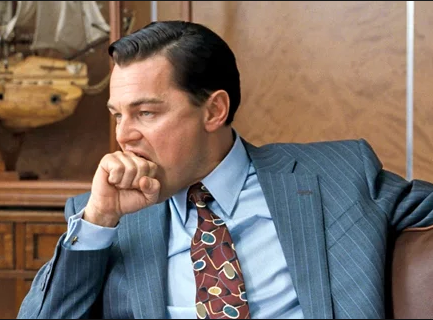

In [1]:
from IPython.display import Image
Image("not_ethical.png")

### Edit Mode vs Command Mode

There are two modes in a notebook: 1) **edit** mode; 2) **command** mode.  

In **edit** mode you are *inside* a cell and you can edit the contents of the cell.  

In **command** mode, you are *outside* the cells and you can navigate between them.  

### Keyboard Shortcuts

Here are some of my favorite keyboard shortcuts:

edit mode: **enter**

command mode: **esc**

navigate up: **k**

navigate down: **j**

insert cell above: **a**

insert cell below: **b**

delete cell: **d, d** (press **d** twice)

switch to code cell: **y**

switch to markup cell: **m**

execute and stay on current cell: **ctrl + enter**

execute and move down a cell: **shift + enter**

### Drop Down Menus

Here are a few of the drop down menu functions that I use frequently:

*Kernel > Restart Kernel and Clear All Outputs*

*Kernel > Restart Kearnel and Run All Cells*

*Run > Run All Above Selected Cell*

### Importing Packages

The power and convenience of Python as a data analysis tool comes from the ecosystem of freely available third party packages.

Here are the packages that we will be using in this tutorial:

`numpy` - efficient vector and matrix computations

`pandas` - working with `DataFrames`

`pandas_datareader` - reading data from Yahoo Finance

The following code imports these packages and assigns them each an alias.

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

### Reading-In Stock Data into a `DataFrame`

Let's begin by reading in 5 years of SPY price data from Yahoo Finance.  

SPY is an ETF that tracks the performace of the SP500 stock index.

In [3]:
df_spy = pdr.get_data_yahoo('SPY', start='2014-01-01', end='2019-01-01')
df_spy = df_spy.round(2)
df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,184.07,182.48,183.98,182.92,119636900.0,158.56
2014-01-03,183.60,182.63,183.23,182.89,81390600.0,158.54
2014-01-06,183.56,182.08,183.49,182.36,108028200.0,158.08
2014-01-07,183.79,182.95,183.09,183.48,86144200.0,159.05
2014-01-08,183.83,182.89,183.45,183.52,96582300.0,159.08


Our stock data now lives in the variable called `df_spy`, which is a `pandas` data structure known as a `DataFrame`.  We can see this by using the following code:

In [4]:
type(df_spy)

pandas.core.frame.DataFrame

### `DataFrame` Index

In `pandas`, a `DataFrame` always has an index.  For `df_spy` the `Dates` form the index.

In [5]:
df_spy.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

I don't use indices very much, so let's make the `Date` index just a regular column.  Notice that we can modify `DataFrames` inplace.

In [6]:
df_spy.reset_index(inplace=True)
df_spy

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,184.07,182.48,183.98,182.92,119636900.0,158.56
1,2014-01-03,183.60,182.63,183.23,182.89,81390600.0,158.54
2,2014-01-06,183.56,182.08,183.49,182.36,108028200.0,158.08
3,2014-01-07,183.79,182.95,183.09,183.48,86144200.0,159.05
4,2014-01-08,183.83,182.89,183.45,183.52,96582300.0,159.08
...,...,...,...,...,...,...,...
1253,2018-12-24,240.84,234.27,239.04,234.34,147311600.0,224.30
1254,2018-12-26,246.18,233.76,235.97,246.18,218485400.0,235.63
1255,2018-12-27,248.29,238.96,242.57,248.07,186267300.0,237.44
1256,2018-12-28,251.40,246.45,249.58,247.75,153100200.0,237.13


Notice that `df_spy` still has an index, now it's just a sequence of integers.

In [7]:
df_spy.index

RangeIndex(start=0, stop=1258, step=1)

### A Bit of Cleaning

As a matter of preference, I like to make my column names snake case.

In [8]:
df_spy.columns = df_spy.columns.str.lower().str.replace(' ','_')
df_spy.head()

,date,high,low,open,close,volume,adj_close
0,2014-01-02,184.07,182.48,183.98,182.92,119636900.0,158.56
1,2014-01-03,183.60,182.63,183.23,182.89,81390600.0,158.54
2,2014-01-06,183.56,182.08,183.49,182.36,108028200.0,158.08
3,2014-01-07,183.79,182.95,183.09,183.48,86144200.0,159.05
4,2014-01-08,183.83,182.89,183.45,183.52,96582300.0,159.08


Let's also remove the columns that we won't need.  We first create a `list` of the column names that we want to get rid of and then we use the `DataFrame.drop()` method.

In [9]:
lst_cols = ['high', 'low', 'open', 'close', 'volume',]
df_spy.drop(columns=lst_cols, inplace=True)
df_spy.head()

,date,adj_close
0,2014-01-02,158.56
1,2014-01-03,158.54
2,2014-01-06,158.08
3,2014-01-07,159.05
4,2014-01-08,159.08


Notice that trailing commas are not an issue in Python.

### `Series`

You can isolate the columns of a `DataFrame` with square brackets as follows:

In [10]:
df_spy['adj_close']

0       158.56
1       158.54
2       158.08
3       159.05
4       159.08
         ...  
1253    224.30
1254    235.63
1255    237.44
1256    237.13
1257    239.21
Name: adj_close, Length: 1258, dtype: float64

The columns of a `DataFrame` are a `pandas` data structure called a `Series`.

In [11]:
type(df_spy['adj_close'])

pandas.core.series.Series

###  `numpy` and `ndarrays`

Python is a general purpose programming language and was not created for scientific computing in particular.  One of the foundational packages that makes Python well suited to scientific computing is `numpy`, which has a variety of features including a data type called `ndarrays`.  One of the benefits of `ndarrays` is that they allow for efficient vector and matrix computation.

The `values` of a `Series` object is a `numpy.ndarray`.  This is one sense in which `pandas` is *built on top of* `numpy`.

In [12]:
df_spy['adj_close'].values

array([158.56, 158.54, 158.08, ..., 237.44, 237.13, 239.21])

In [13]:
type(df_spy['adj_close'].values)

numpy.ndarray

### `Series` Built-In Methods

`Series` have a variety of built-in methods that provide convenient summarization and modification functionality.  For example, you can `.sum()` all the elements of the `Series`.

In [14]:
df_spy['adj_close'].sum()

259032.07

Next, we calculate the standard deviation of all the elements of the `Series`.

In [15]:
df_spy['adj_close'].std()

34.188328034526734

The `.shift()` built-in method will be useful for calculating returns in the next section.

In [16]:
df_spy['adj_close'].shift()

0          NaN
1       158.56
2       158.54
3       158.08
4       159.05
         ...  
1253    230.39
1254    224.30
1255    235.63
1256    237.44
1257    237.13
Name: adj_close, Length: 1258, dtype: float64

### Calculating Daily Returns

Our analysis analysis of the leverage effect will involve daily returns for all the days in `df_spy`.  Let's calculate those now.

Recall that the end-of-day day $t$ return of a stock is defined as: $r_{t} = \frac{S_{t}}{S_{t-1}} - 1$, where $S_{t}$ is the stock price at end-of-day $t$.

Here is a vectorized approach to calculating all the daily returns in a single line of code.

In [17]:
df_spy['ret'] = df_spy['adj_close'] / df_spy['adj_close'].shift(1) - 1
df_spy.head()

,date,adj_close,ret
0,2014-01-02,158.56,NaN
1,2014-01-03,158.54,-0.000126
2,2014-01-06,158.08,-0.002901
3,2014-01-07,159.05,0.006136
4,2014-01-08,159.08,0.000189


Notice that we can create a new column of a `DataFrame` by using variable assignment syntax.

### Visualizing Adjusted Close Prices

Python has a variety of packages that can be used for visualization.  For this tutorial, we will focus on built-in plotting capabilities of `pandas`.  These capabilities are built on top of the `matplotlib` package, which is the foundation of much of Python's visualization ecosystem.

`DataFrames` have a built-in `.plot()` method that makes creating simple line graphs quite easy.

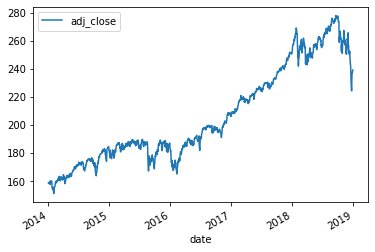

In [18]:
df_spy.plot(x='date', y='adj_close');

If we wanted to make this graph more presentable we could do something like:

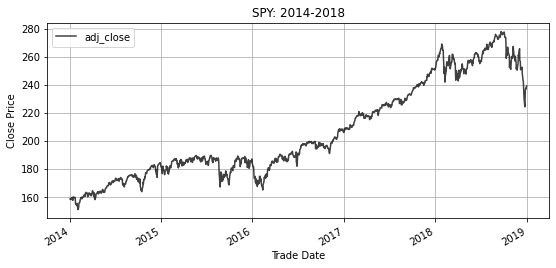

In [19]:
ax = df_spy.\
        plot(
            x = 'date',
            y = 'adj_close',
            title = 'SPY: 2014-2018',
            grid = True,
            style = 'k',
            alpha = 0.75,
            figsize = (9, 4),
        );
ax.set_xlabel('Trade Date');
ax.set_ylabel('Close Price');

Notice that the `ax` variable created above is a `matplotlib` object.

In [20]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

### Visualizing Returns

Pandas also gives us the ability to simultaneously plot two different columns of a `DataFrame` in separate subplots of a single graph.  Here is what that code looks like:

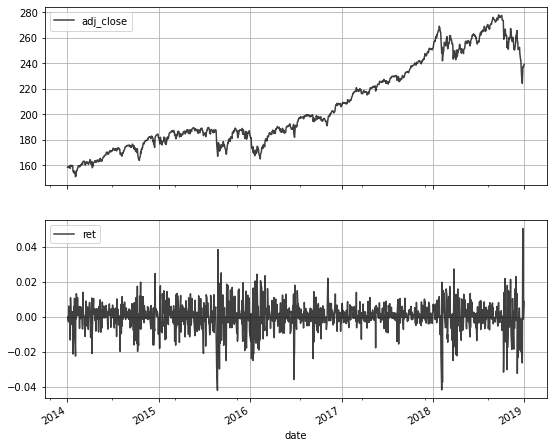

In [21]:
df_spy.plot(x='date', y=['adj_close', 'ret',], subplots=True, style='k', alpha=0.75, figsize=(9, 8), grid=True);

The `returns` graph above is a bit of a hack, but it's used all the time in finance to demonstrate volatility clustering.

Notice that whenever there is a sharp drop in the `adj_close` price graph, that the magnitude of the nearby returns becomes large.  In contrast, during periods of steady growth (e.g. all of 2017) the magnitude of the returns is small.

### Calculating Realized Volatility

Realized volatility is defined as the standard deviation of the daily returns; it indicates how much variability in the stock price there has been.  It is a matter of convention to annualize this quantity, so we multiply it by $\sqrt{252}$.

The following vectorized code calculates a rolling 2-month volatility for our SPY price data.

In [22]:
df_spy['ret'].rolling(42).std() * np.sqrt(252)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1253    0.226709
1254    0.252811
1255    0.249180
1256    0.245997
1257    0.247003
Name: ret, Length: 1258, dtype: float64

Let's add these realized volatility calculations to`df_spy` this with the following code: 

In [24]:
df_spy['realized_vol'] = df_spy['ret'].rolling(42).std() * np.sqrt(252)
df_spy

,date,adj_close,ret,realized_vol
0,2014-01-02,158.56,NaN,NaN
1,2014-01-03,158.54,-0.000126,NaN
2,2014-01-06,158.08,-0.002901,NaN
3,2014-01-07,159.05,0.006136,NaN
4,2014-01-08,159.08,0.000189,NaN
...,...,...,...,...
1253,2018-12-24,224.30,-0.026433,0.226709
1254,2018-12-26,235.63,0.050513,0.252811
1255,2018-12-27,237.44,0.007682,0.249180
1256,2018-12-28,237.13,-0.001306,0.245997


### Visualizing Realized Volatility

We can easily add `realized_vol` to our graph with the following code:

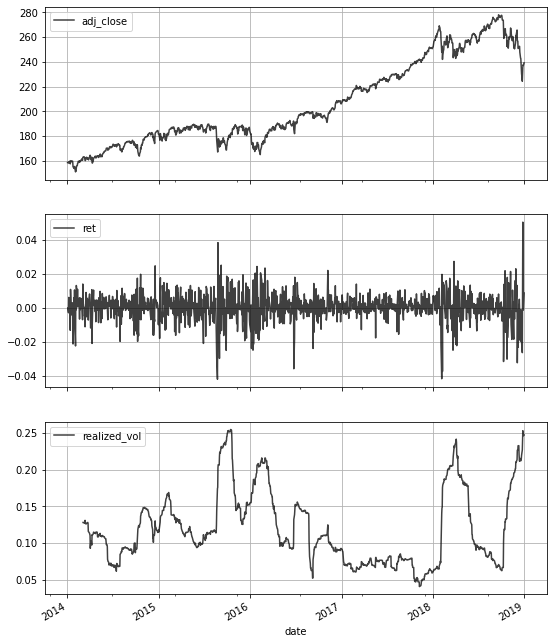

In [25]:
df_spy.plot(x = 'date', y = ['adj_close','ret','realized_vol',], subplots=True, style='k', alpha=0.75, figsize=(9, 12), grid=True);

This graph is an excellent illustration of the leverage effect.  When SPY suffers losses, there is a spike in realized volatility, which is to say that the magnitude of the nearby returns increases.

## Further Reading

*Python Data Science Handbook* - Jake VanderPlas

*Python for Finance* - Yves Hilpisch

*Python for Data Analysis* - Wes McKinney

*Automate the Boring Stuff* - Al Sweigert